In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

pd.options.display.max_rows = 100

np.random.seed(123)

In [2]:
import wrangle_zillow as w
import explore as e

In [3]:
df = w.acquire_zillow()

Using cached csv


In [4]:
df.shape

(77380, 68)

In [5]:
train, validate, test = w.prepare_zillow(df)

In [6]:
train.shape, validate.shape, test.shape

((38192, 16), (16368, 16), (13640, 16))

In [7]:
38192 + 16368 + 13640

68200

In [8]:
train.head()

,bathrooms,bedrooms,squarefeet,num_fireplace,latitude,longitude,regionidzip,threequarter_baths,logerror,age,fips_06037,fips_06059,fips_06111,hottub_or_spa,has_pool,tax_delinquency
44785,2.0,4.0,1430.0,0.0,33656927.0,-117951898.0,96964,0.0,0.262900,49,0,1,0,0,0,0
16267,3.0,5.0,2625.0,0.0,34302964.0,-118506606.0,96370,0.0,-0.045759,52,1,0,0,0,1,0
24208,2.5,3.0,1109.0,0.0,33655478.0,-117684439.0,96962,1.0,-0.011548,28,0,1,0,0,0,0
40323,3.0,3.0,1732.0,0.0,34569171.0,-118065585.0,97328,0.0,-0.041808,33,1,0,0,0,0,0
71569,1.0,2.0,808.0,0.0,33896400.0,-118253813.0,96090,0.0,-0.090481,66,1,0,0,0,0,0


In [9]:
import explore as e

In [10]:
conts = ['bathrooms', 'bedrooms', 'squarefeet', 'num_fireplace', 'threequarter_baths', 'age']
target = 'logerror'
train_pos = train[train.logerror >= 0]
train_neg = train[train.logerror < 0]

## Question: How do our continuous variables align with our (cont) target variable? 
### Is there a linear relationship? (pearsonr)

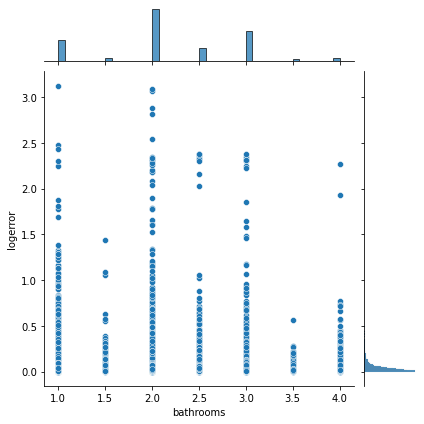

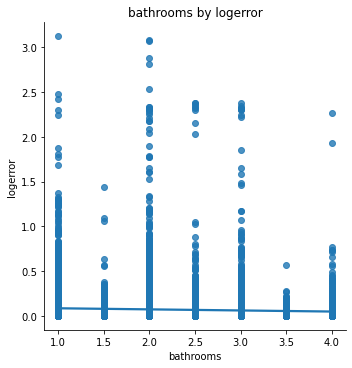

H0: There is no linear relationship between bathrooms and logerror.
HA: There is a linear relationship between bathrooms and logerror.
----------------------------------------------------------------
p-value: 1.1594987199400326e-16

With a p-value below our established alpha we reject the null hypothesis.


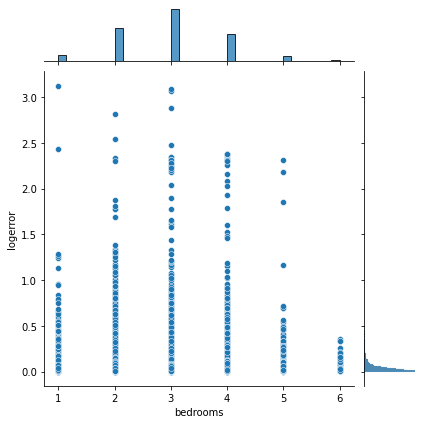

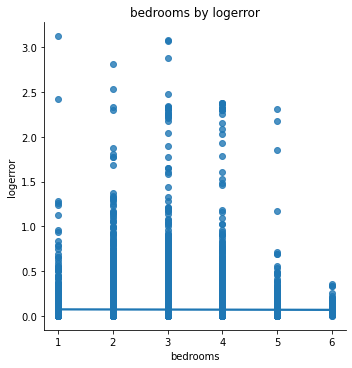

H0: There is no linear relationship between bedrooms and logerror.
HA: There is a linear relationship between bedrooms and logerror.
----------------------------------------------------------------
We fail to reject the null hypothesis.


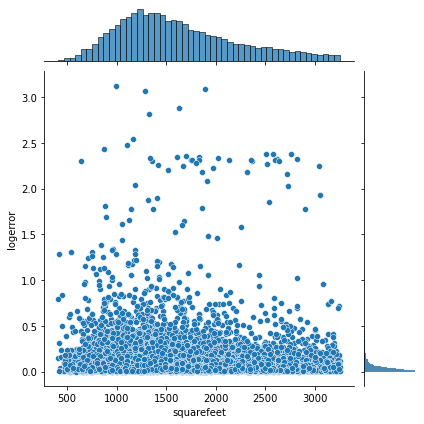

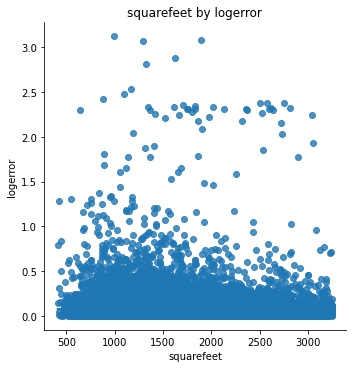

H0: There is no linear relationship between squarefeet and logerror.
HA: There is a linear relationship between squarefeet and logerror.
----------------------------------------------------------------
p-value: 0.008657172288263792

With a p-value below our established alpha we reject the null hypothesis.


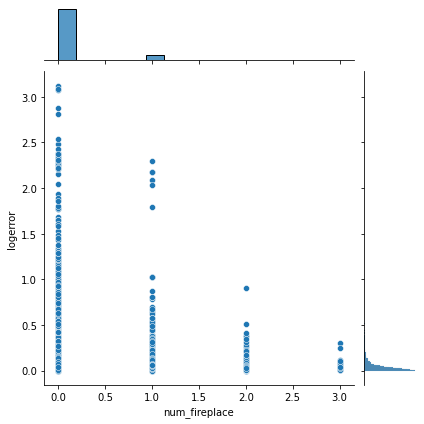

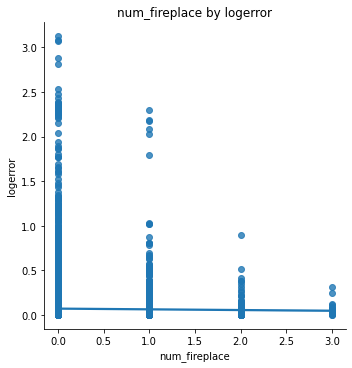

H0: There is no linear relationship between num_fireplace and logerror.
HA: There is a linear relationship between num_fireplace and logerror.
----------------------------------------------------------------
p-value: 0.005404688835096297

With a p-value below our established alpha we reject the null hypothesis.


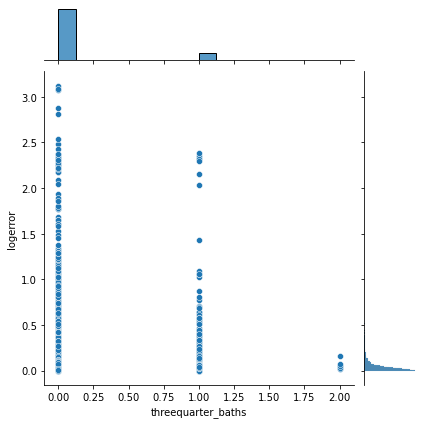

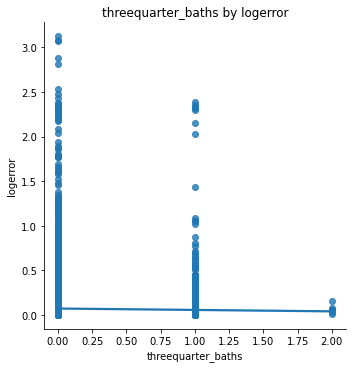

H0: There is no linear relationship between threequarter_baths and logerror.
HA: There is a linear relationship between threequarter_baths and logerror.
----------------------------------------------------------------
p-value: 6.04775083275726e-07

With a p-value below our established alpha we reject the null hypothesis.


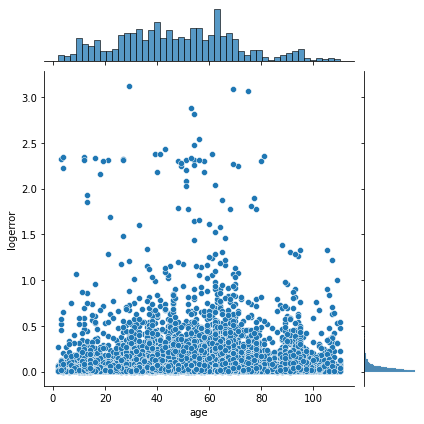

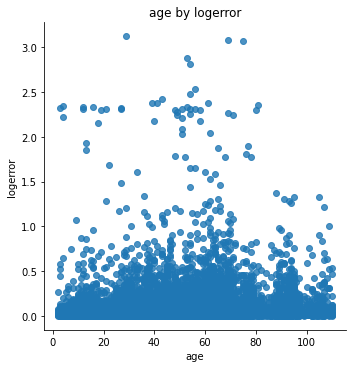

H0: There is no linear relationship between age and logerror.
HA: There is a linear relationship between age and logerror.
----------------------------------------------------------------
p-value: 1.8636961591025224e-43

With a p-value below our established alpha we reject the null hypothesis.


In [11]:
e.linear_tests(train_pos, conts, target)

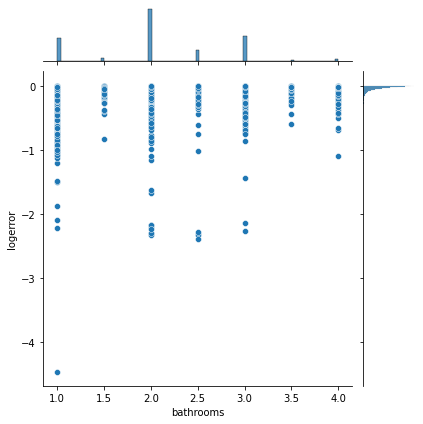

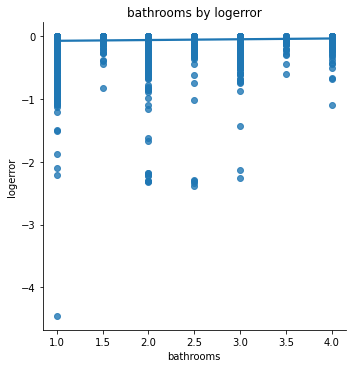

H0: There is no linear relationship between bathrooms and logerror.
HA: There is a linear relationship between bathrooms and logerror.
----------------------------------------------------------------
p-value: 1.7883300661804393e-22

With a p-value below our established alpha we reject the null hypothesis.


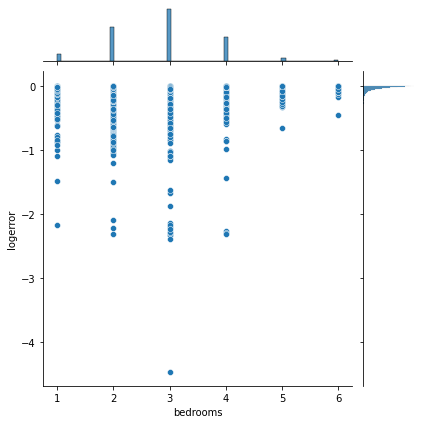

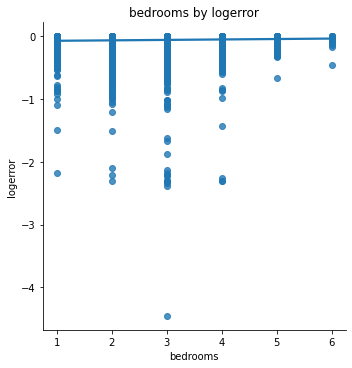

H0: There is no linear relationship between bedrooms and logerror.
HA: There is a linear relationship between bedrooms and logerror.
----------------------------------------------------------------
p-value: 4.468203380517155e-12

With a p-value below our established alpha we reject the null hypothesis.


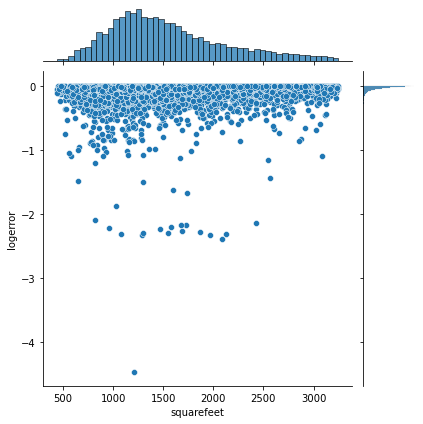

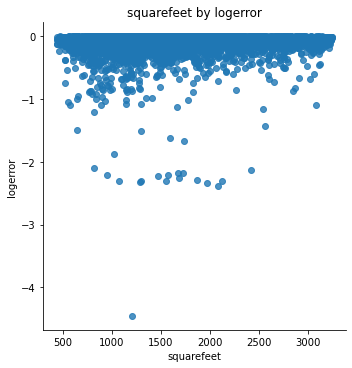

H0: There is no linear relationship between squarefeet and logerror.
HA: There is a linear relationship between squarefeet and logerror.
----------------------------------------------------------------
p-value: 0.004963858479136602

With a p-value below our established alpha we reject the null hypothesis.


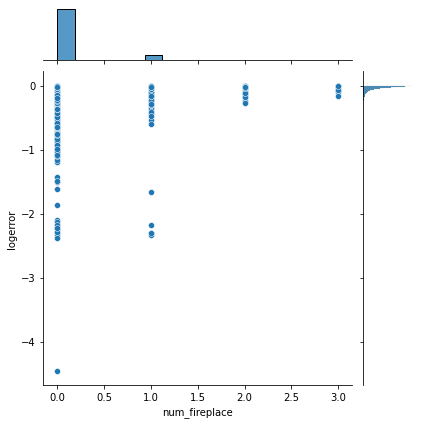

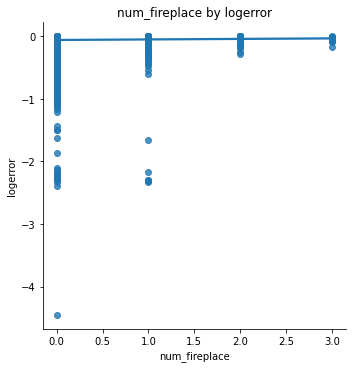

H0: There is no linear relationship between num_fireplace and logerror.
HA: There is a linear relationship between num_fireplace and logerror.
----------------------------------------------------------------
p-value: 0.0006947274290749039

With a p-value below our established alpha we reject the null hypothesis.


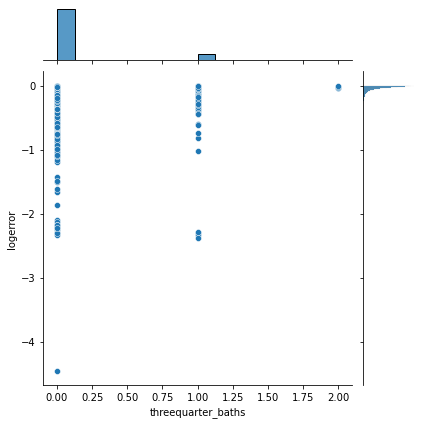

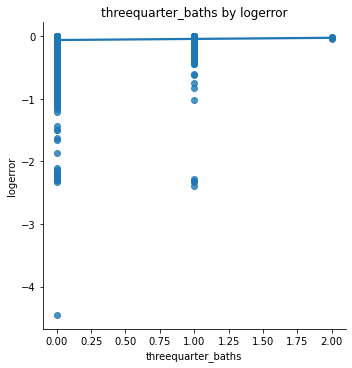

H0: There is no linear relationship between threequarter_baths and logerror.
HA: There is a linear relationship between threequarter_baths and logerror.
----------------------------------------------------------------
p-value: 2.885949535575221e-10

With a p-value below our established alpha we reject the null hypothesis.


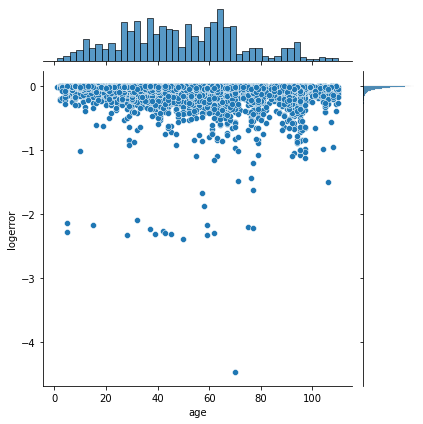

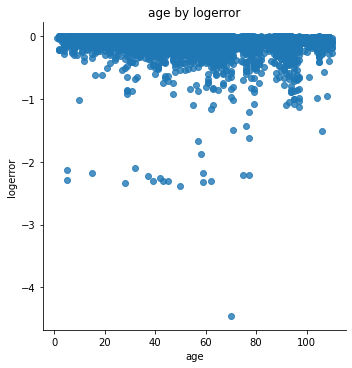

H0: There is no linear relationship between age and logerror.
HA: There is a linear relationship between age and logerror.
----------------------------------------------------------------
p-value: 7.452018292506657e-76

With a p-value below our established alpha we reject the null hypothesis.


In [12]:
e.linear_tests(train_neg, conts, target)

## Question: How do our categorical variables interact with our target? 

In [13]:
cats = ['tax_delinquency', 'has_pool', 'hottub_or_spa', 'fips_06111', 'fips_06059', 'fips_06037']

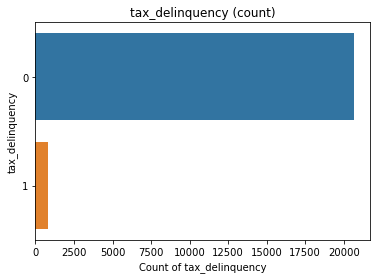

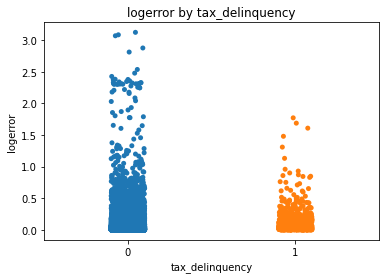

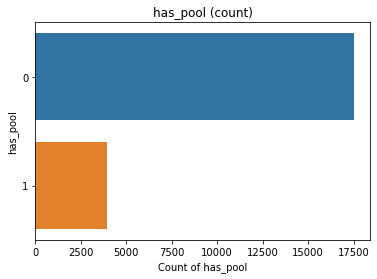

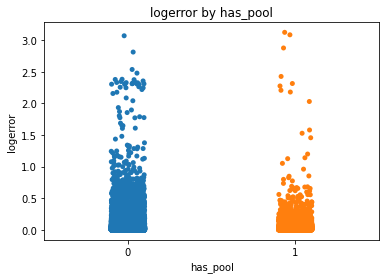

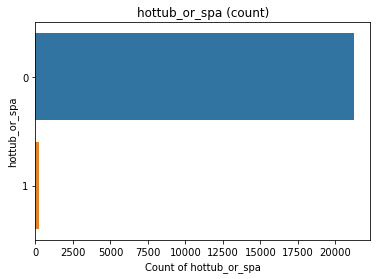

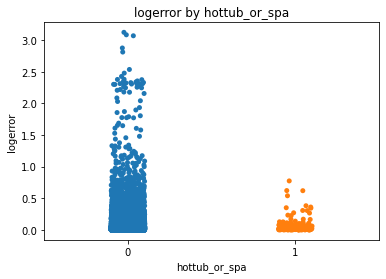

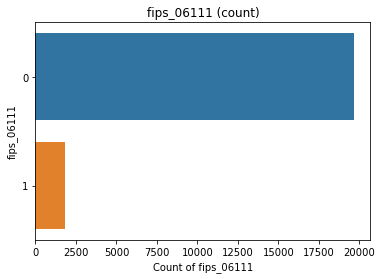

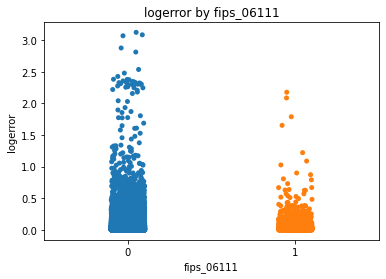

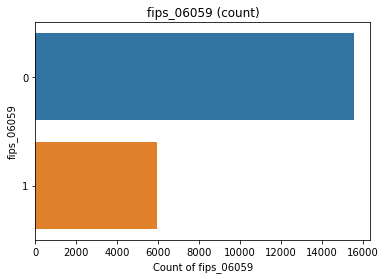

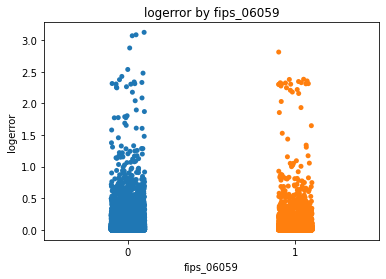

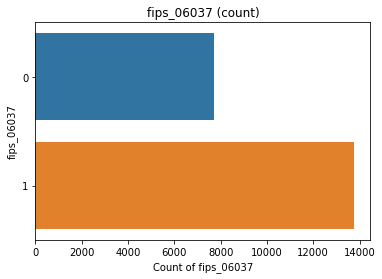

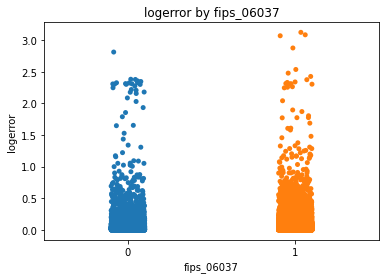

In [14]:
e.cat_visuals(train_pos, cats, target)

<AxesSubplot:>

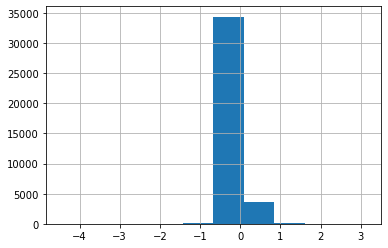

In [15]:
# Let's do an t-test to see if the mean logerror changes between the fips
train.logerror.hist()

In [16]:
from scipy import stats
def run_ttest(subset):
    a = .05
    print(f'H0: The mean of log error for all houses is equal to the mean log error of selected subset.')
    print(f'HA: The mean of log error for all houses is not equal to the mean log error of selected subset.\n')
    t, p = stats.ttest_1samp(subset.logerror, overall_logerror_mean)
    print(f't value: {t}, p value: {p}\n')
    if p < a:
        print('Because p value is less than alpha we can reject the null hypothesis.\n')
    else:
        print('We fail to reject the null hypothesis.\n')


overall_logerror_mean = train.logerror.mean()
train.groupby('fips_06111').apply(run_ttest)

H0: The mean of log error for all houses is equal to the mean log error of selected subset.
HA: The mean of log error for all houses is not equal to the mean log error of selected subset.

t value: -0.13340110660922375, p value: 0.8938769357229794

We fail to reject the null hypothesis.

H0: The mean of log error for all houses is equal to the mean log error of selected subset.
HA: The mean of log error for all houses is not equal to the mean log error of selected subset.

t value: 0.47017211271635945, p value: 0.6382649081240939

We fail to reject the null hypothesis.



""


In [17]:
train.groupby('fips_06059').apply(run_ttest)

H0: The mean of log error for all houses is equal to the mean log error of selected subset.
HA: The mean of log error for all houses is not equal to the mean log error of selected subset.

t value: -1.1004291574480667, p value: 0.2711546962883867

We fail to reject the null hypothesis.

H0: The mean of log error for all houses is equal to the mean log error of selected subset.
HA: The mean of log error for all houses is not equal to the mean log error of selected subset.

t value: 1.617047720708215, p value: 0.1058984434635415

We fail to reject the null hypothesis.



""


In [18]:
train.groupby('fips_06037').apply(run_ttest)

H0: The mean of log error for all houses is equal to the mean log error of selected subset.
HA: The mean of log error for all houses is not equal to the mean log error of selected subset.

t value: 1.6601312299615891, p value: 0.09691132159168722

We fail to reject the null hypothesis.

H0: The mean of log error for all houses is equal to the mean log error of selected subset.
HA: The mean of log error for all houses is not equal to the mean log error of selected subset.

t value: -1.3302684644644835, p value: 0.1834421086494014

We fail to reject the null hypothesis.



""


In [19]:
# For pool, there is a statistical significance in the means not being equal (between logerror)
train.groupby('has_pool').apply(run_ttest)

H0: The mean of log error for all houses is equal to the mean log error of selected subset.
HA: The mean of log error for all houses is not equal to the mean log error of selected subset.

t value: 1.4922942589518011, p value: 0.13563228342229833

We fail to reject the null hypothesis.

H0: The mean of log error for all houses is equal to the mean log error of selected subset.
HA: The mean of log error for all houses is not equal to the mean log error of selected subset.

t value: -3.381250443484099, p value: 0.0007252780365788803

Because p value is less than alpha we can reject the null hypothesis.



""


In [20]:
train.groupby('hottub_or_spa').apply(run_ttest)

H0: The mean of log error for all houses is equal to the mean log error of selected subset.
HA: The mean of log error for all houses is not equal to the mean log error of selected subset.

t value: 0.14558262749919557, p value: 0.8842516608983229

We fail to reject the null hypothesis.

H0: The mean of log error for all houses is equal to the mean log error of selected subset.
HA: The mean of log error for all houses is not equal to the mean log error of selected subset.

t value: -1.4328314492353638, p value: 0.1525779518299211

We fail to reject the null hypothesis.



""


In [21]:
# There is statistical significance with tax delinquency (1)
train.groupby('tax_delinquency').apply(run_ttest)

H0: The mean of log error for all houses is equal to the mean log error of selected subset.
HA: The mean of log error for all houses is not equal to the mean log error of selected subset.

t value: -0.5799741253603609, p value: 0.5619356180099018

We fail to reject the null hypothesis.

H0: The mean of log error for all houses is equal to the mean log error of selected subset.
HA: The mean of log error for all houses is not equal to the mean log error of selected subset.

t value: 2.156649789227055, p value: 0.03120338330623141

Because p value is less than alpha we can reject the null hypothesis.



""


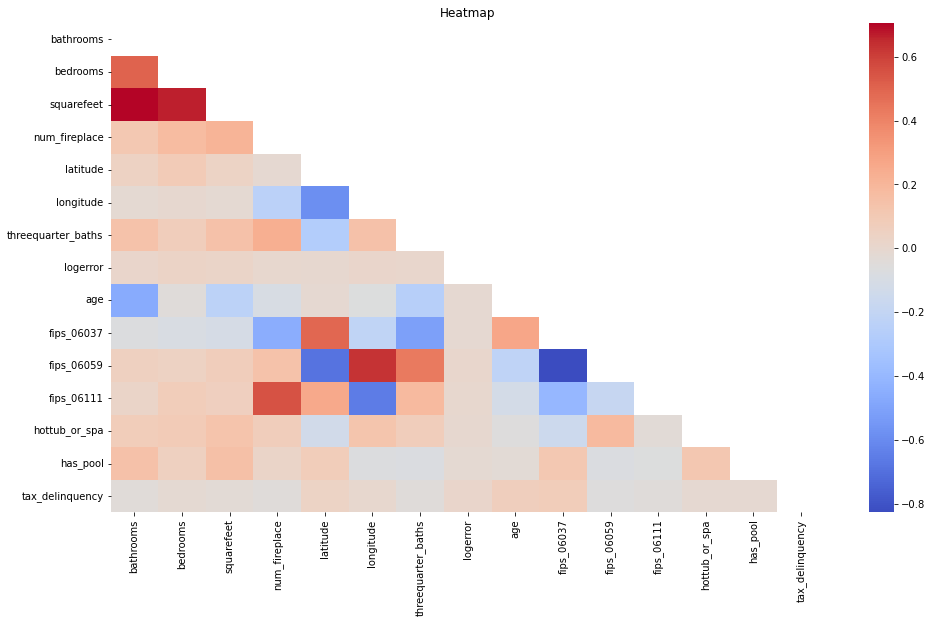

In [22]:
e.heatmap_zillow(train)

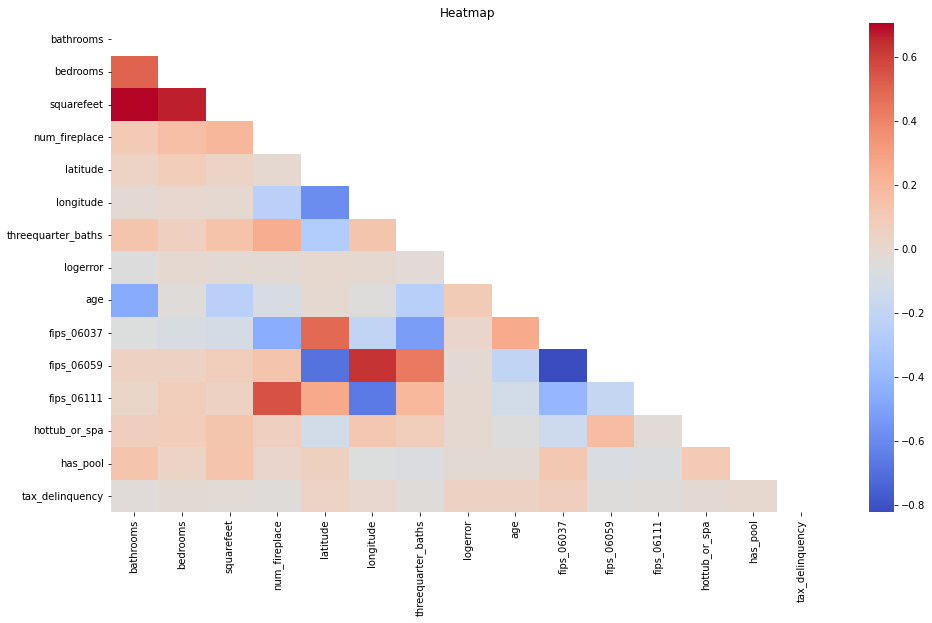

In [23]:
e.heatmap_zillow(train_pos)

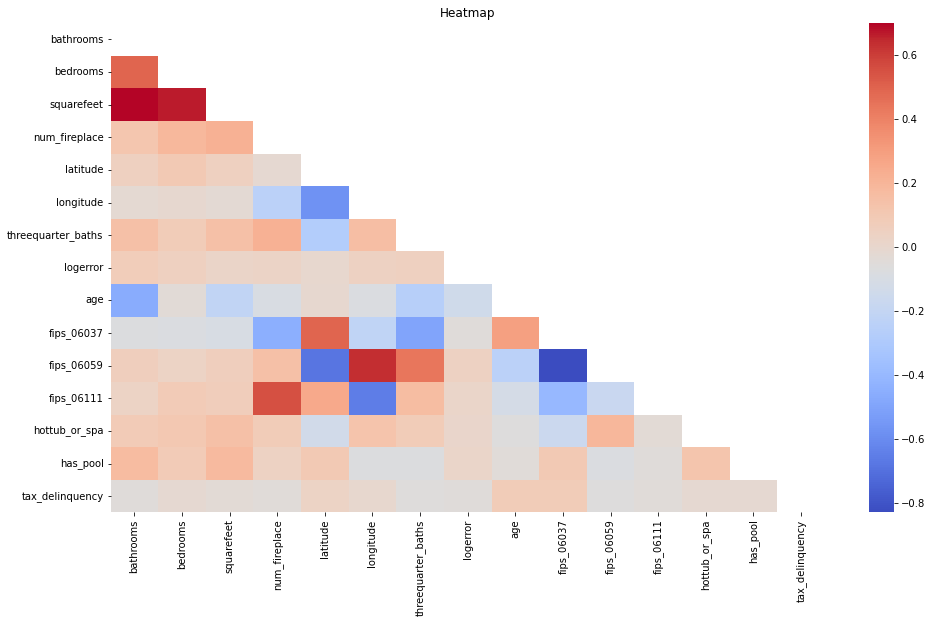

In [24]:
e.heatmap_zillow(train_neg)

In [25]:
# The only variable that seems to indicate any (small at that) correlation is age with our target of logerror.

### Prior to clustering we need to scale the data:

In [26]:
quants = ['bathrooms', 'bedrooms', 'squarefeet', 'num_fireplace', 'latitude',
          'longitude', 'threequarter_baths', 'age']

In [27]:
train, validate, test = e.scale_zillow(train, validate, test, quants)

In [28]:
train.head()

,bathrooms,bedrooms,squarefeet,num_fireplace,latitude,longitude,regionidzip,threequarter_baths,logerror,age,fips_06037,fips_06059,fips_06111,hottub_or_spa,has_pool,tax_delinquency
44785,0.333333,0.6,0.359182,0.0,0.214570,0.792189,96964,0.0,0.262900,0.440367,0,1,0,0,0,0
16267,0.666667,0.8,0.780402,0.0,0.651305,0.498547,96370,0.0,-0.045759,0.467890,1,0,0,0,1,0
24208,0.500000,0.4,0.246035,0.0,0.213590,0.933771,96962,0.5,-0.011548,0.247706,0,1,0,0,0,0
40323,0.666667,0.4,0.465633,0.0,0.831267,0.732007,97328,0.0,-0.041808,0.293578,1,0,0,0,0,0
71569,0.000000,0.2,0.139937,0.0,0.376459,0.632366,96090,0.0,-0.090481,0.596330,1,0,0,0,0,0


## Can we obtain a useful cluster from our lat, long, or zipcodes?

In [29]:
col1 = ['latitude', 'longitude']

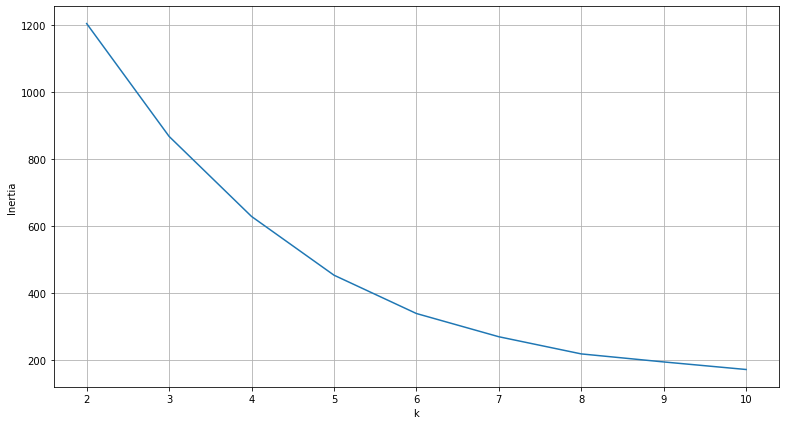

In [30]:
e.elbow_test(train, col1)

In [31]:
centroids, train, validate, test = e.clustering_cols(train, validate, test, col1, 6, 'lat_long_cluster')

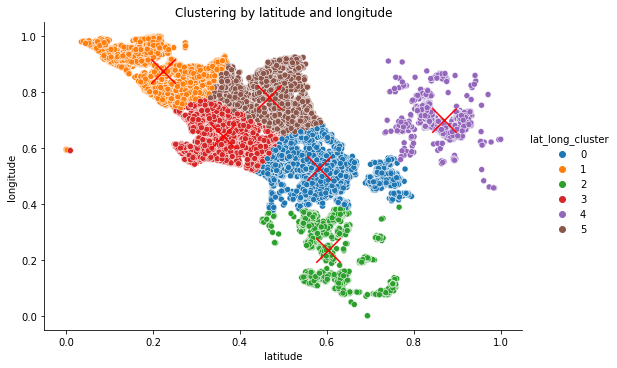

In [32]:
sns.relplot(data=train, x='latitude', y='longitude', hue='lat_long_cluster', aspect=1.5)
plt.title('Clustering by latitude and longitude')
plt.scatter(centroids.latitude, centroids.longitude, marker='x', s=600, c='red')

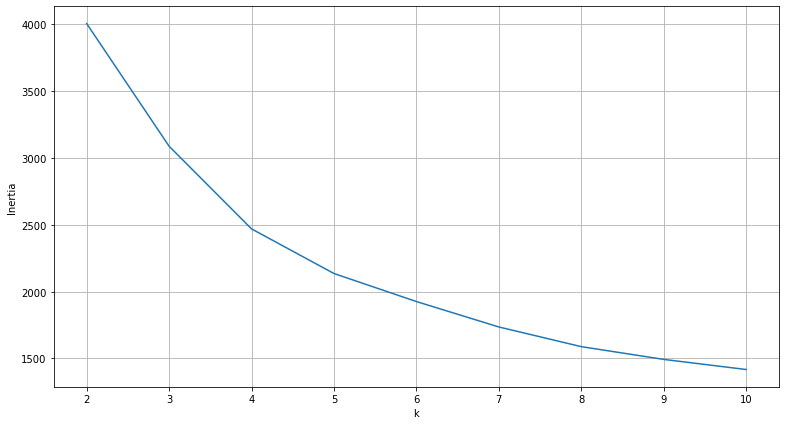

In [33]:
col2 = ['bathrooms', 'bedrooms', 'squarefeet', 'age']
e.elbow_test(train, col2)

In [34]:
centroids, train, validate, test = e.clustering_cols(train, validate, test, col2, 8, 'conts_cluster')

In [35]:
centroids

,bathrooms,bedrooms,squarefeet,age
0,0.608668,0.363072,0.434233,0.238875
1,0.334071,0.370992,0.367045,0.592602
2,0.684586,0.593357,0.689851,0.532720
3,0.343242,0.570114,0.474642,0.473873
4,0.001659,0.276995,0.228870,0.694904
5,0.335734,0.251683,0.285367,0.303445
6,0.008767,0.065352,0.135099,0.348499
7,0.677882,0.574209,0.772318,0.199624


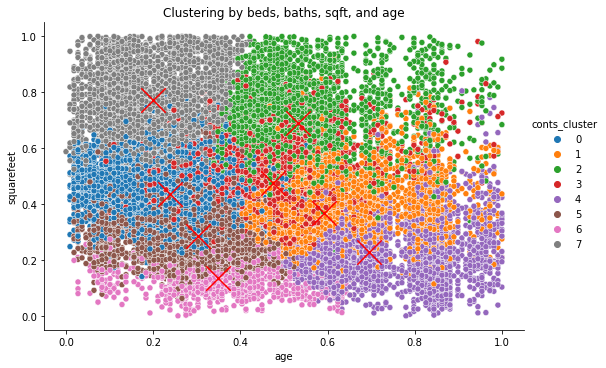

In [36]:
sns.relplot(data=train, x='age', y='squarefeet', hue='conts_cluster', aspect=1.5)
plt.title('Clustering by beds, baths, sqft, and age')
plt.scatter(centroids.age, centroids.squarefeet, marker='x', s=600, c='red')

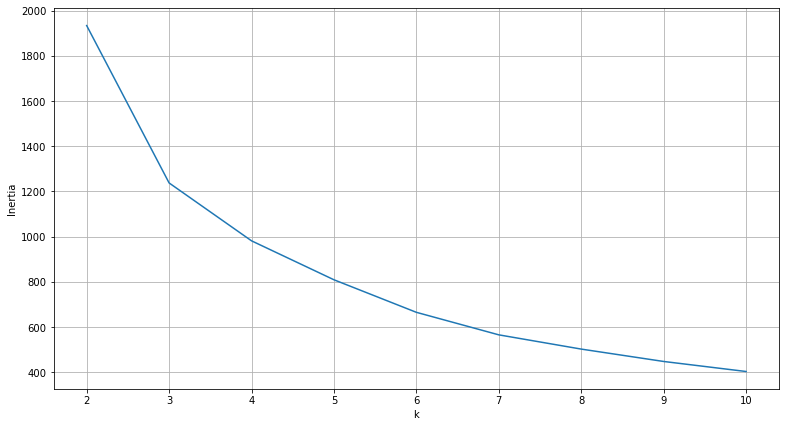

In [37]:
col3 = ['age', 'squarefeet']
e.elbow_test(train, col3)

In [38]:
centroids, train, validate, test = e.clustering_cols(train, validate, test, col3, 4, 'age_sqft_cluster')

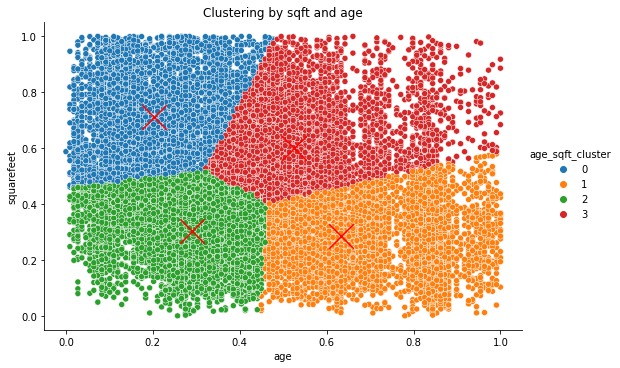

In [39]:
sns.relplot(data=train, x='age', y='squarefeet', hue='age_sqft_cluster', aspect=1.5)
plt.title('Clustering by sqft and age')
plt.scatter(centroids.age, centroids.squarefeet, marker='x', s=600, c='red')

## Let's do a t-test on all of our clusters independently to see if any of them are more useful than another

In [40]:
from scipy import stats
def run_ttest(subset):
    a = .05
    
    print(f'H0: The mean of log error for all houses is equal to the mean log error of selected subset.')
    print(f'HA: The mean of log error for all houses is not equal to the mean log error of selected subset.\n')
    t, p = stats.ttest_1samp(subset.logerror, overall_logerror_mean)
    print(f't value: {t}, p value: {p}\n')
    if p < a:
        print('Because p value is less than alpha we can reject the null hypothesis.\n')
    else:
        print('We fail to reject the null hypothesis.\n')


overall_logerror_mean = train.logerror.mean()
train.groupby('has_pool').apply(run_ttest)

H0: The mean of log error for all houses is equal to the mean log error of selected subset.
HA: The mean of log error for all houses is not equal to the mean log error of selected subset.

t value: 1.4922942589518011, p value: 0.13563228342229833

We fail to reject the null hypothesis.

H0: The mean of log error for all houses is equal to the mean log error of selected subset.
HA: The mean of log error for all houses is not equal to the mean log error of selected subset.

t value: -3.381250443484099, p value: 0.0007252780365788803

Because p value is less than alpha we can reject the null hypothesis.



""


In [41]:
def run_ttest_list(subset, list_):
    a = .05
    t, p = stats.ttest_1samp(subset.logerror, overall_logerror_mean)
    if p < a:
        list_.append(i)

In [42]:
train.head()

,bathrooms,bedrooms,squarefeet,num_fireplace,latitude,longitude,regionidzip,threequarter_baths,logerror,age,fips_06037,fips_06059,fips_06111,hottub_or_spa,has_pool,tax_delinquency,lat_long_cluster,conts_cluster,age_sqft_cluster
44785,0.333333,0.6,0.359182,0.0,0.214570,0.792189,96964,0.0,0.262900,0.440367,0,1,0,0,0,0,1,3,2
16267,0.666667,0.8,0.780402,0.0,0.651305,0.498547,96370,0.0,-0.045759,0.467890,1,0,0,0,1,0,0,2,3
24208,0.500000,0.4,0.246035,0.0,0.213590,0.933771,96962,0.5,-0.011548,0.247706,0,1,0,0,0,0,1,0,2
40323,0.666667,0.4,0.465633,0.0,0.831267,0.732007,97328,0.0,-0.041808,0.293578,1,0,0,0,0,0,4,0,2
71569,0.000000,0.2,0.139937,0.0,0.376459,0.632366,96090,0.0,-0.090481,0.596330,1,0,0,0,0,0,3,4,1


In [43]:
lat_long_list = []
for i, subset in train.groupby('lat_long_cluster'):
    run_ttest_list(subset, lat_long_list)

In [44]:
lat_long_list

[0]

In [45]:
conts_cluster = []
for i, subset in train.groupby('conts_cluster'):
    run_ttest_list(subset, conts_cluster)

In [46]:
conts_cluster

[2, 5, 7]

In [47]:
age_sqft = []
for i, subset in train.groupby('age_sqft_cluster'):
    run_ttest_list(subset, age_sqft)

In [48]:
age_sqft

[0, 2, 3]

## Question: Can we find significance with different zipcodes?

In [49]:
zip_list = []
for i, subset in train.groupby('regionidzip'):
    run_ttest_list(subset, zip_list)

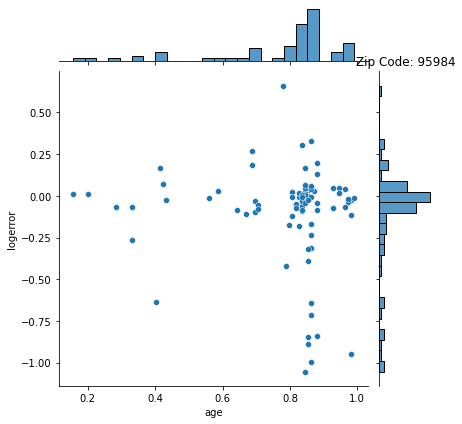

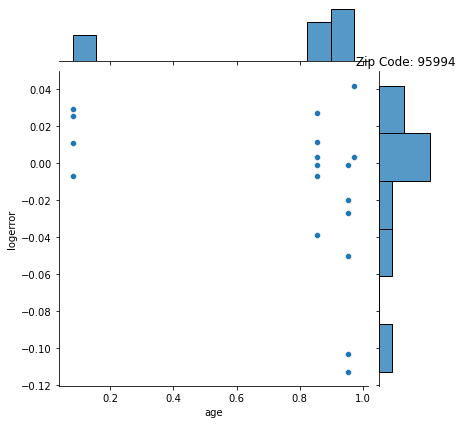

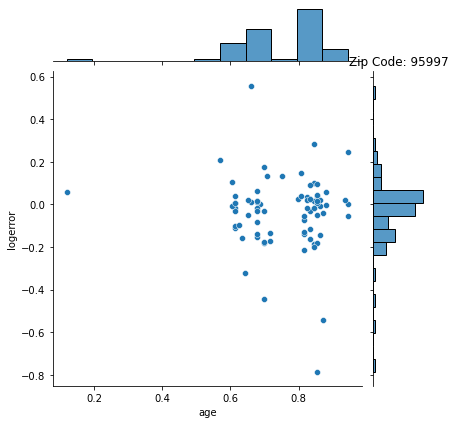

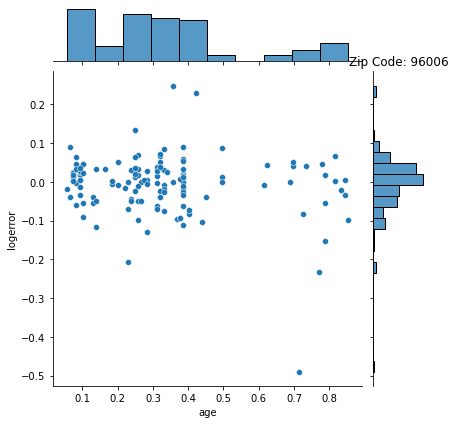

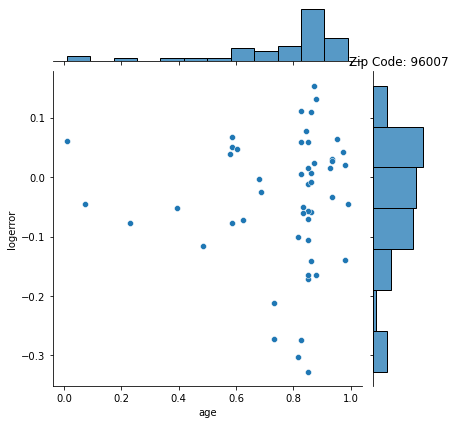

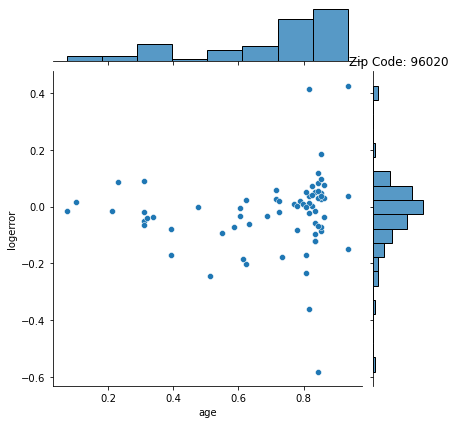

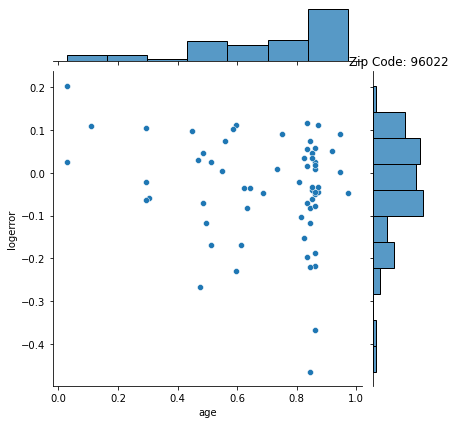

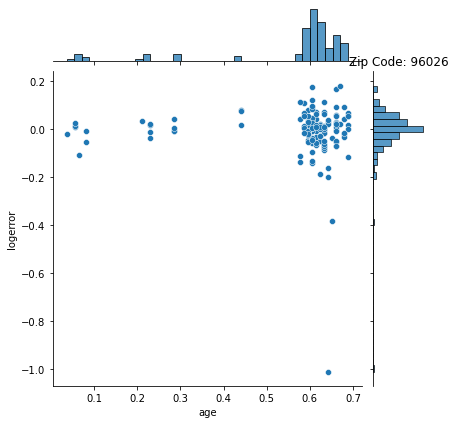

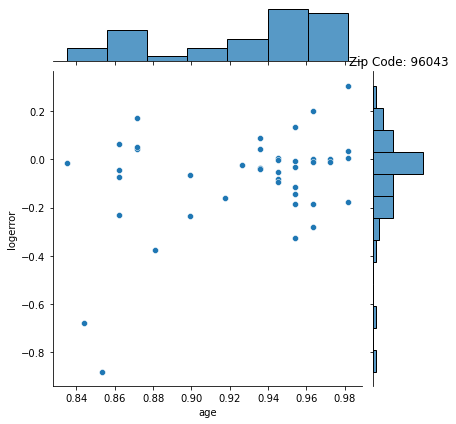

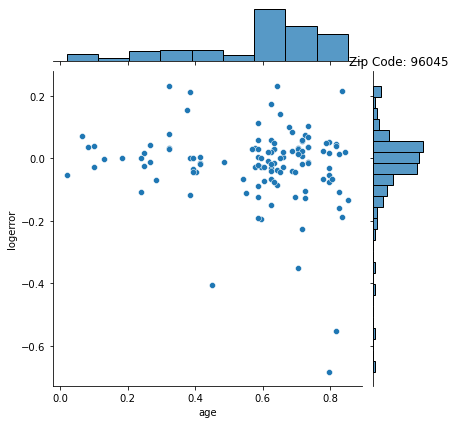

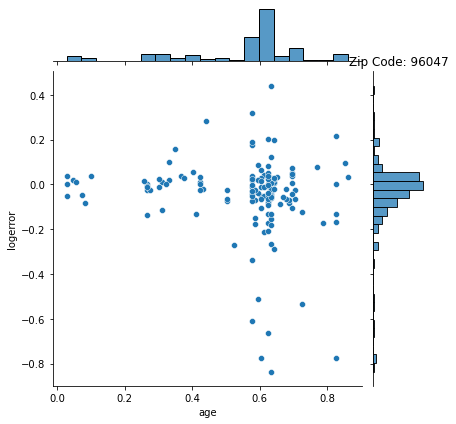

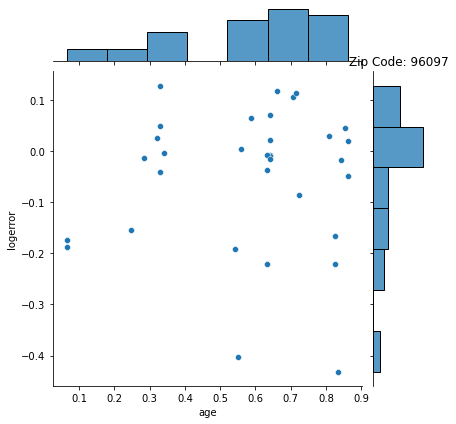

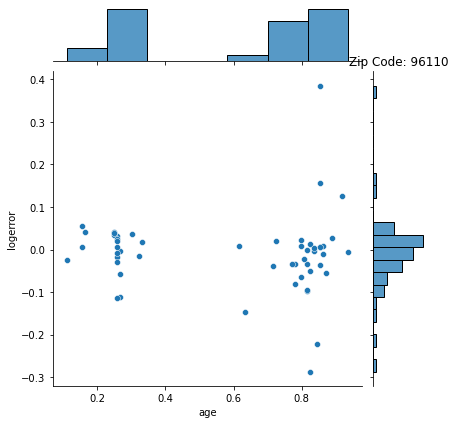

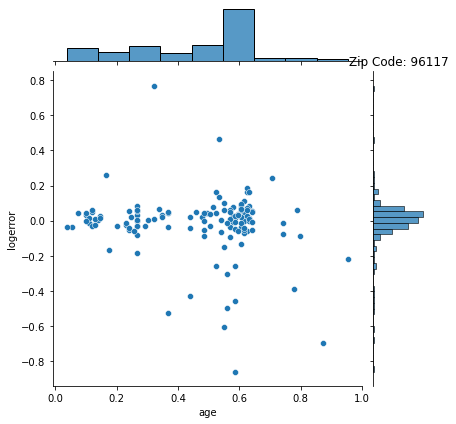

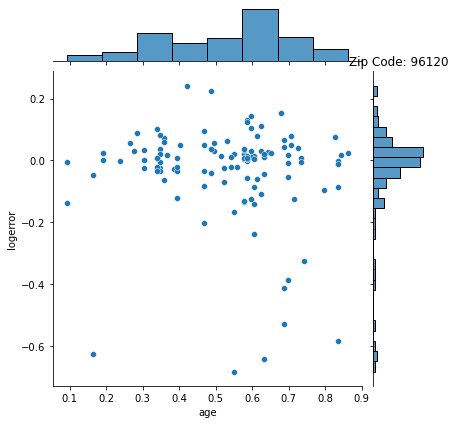

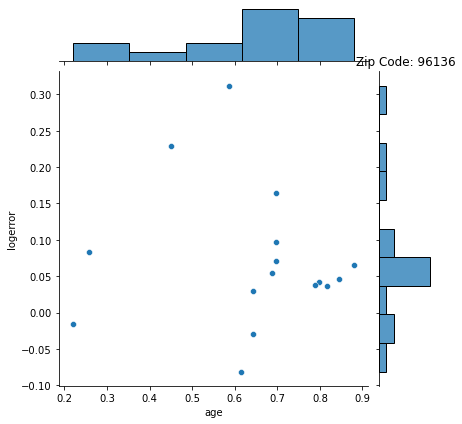

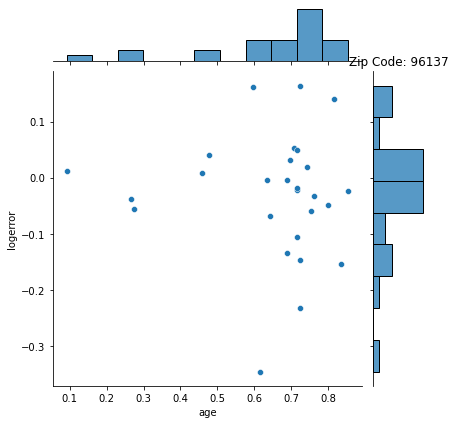

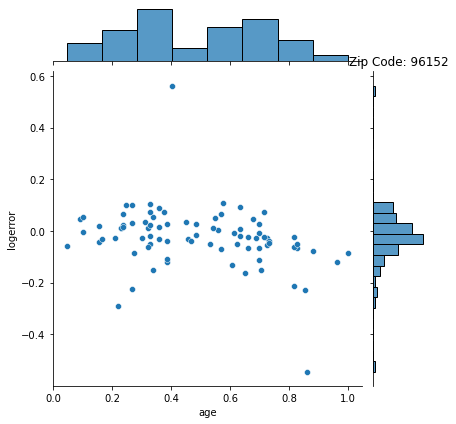

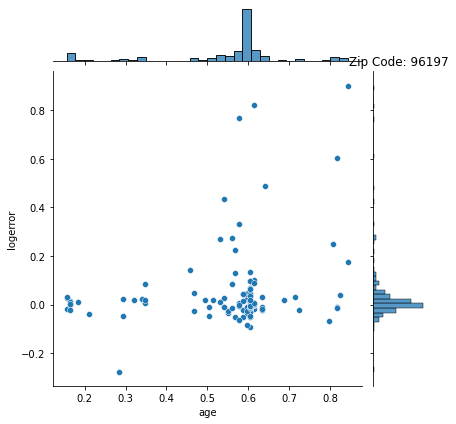

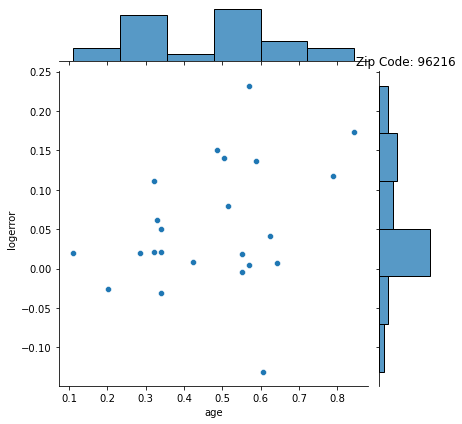

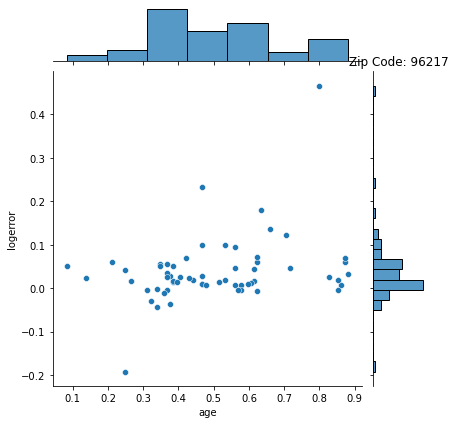

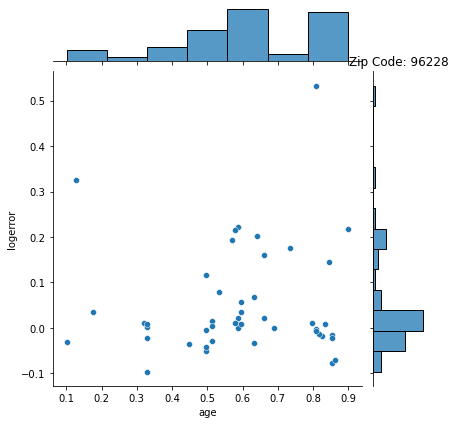

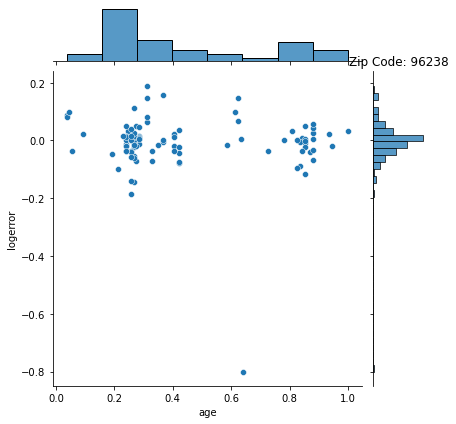

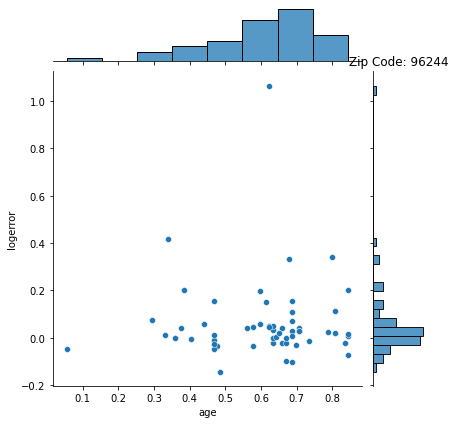

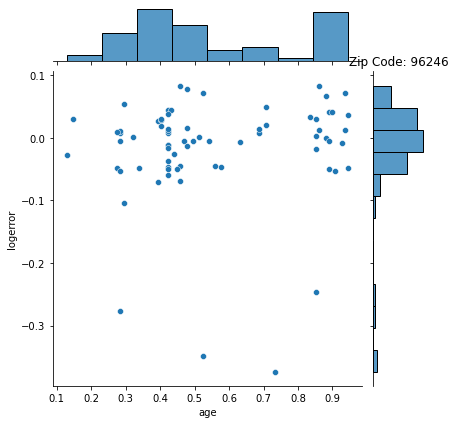

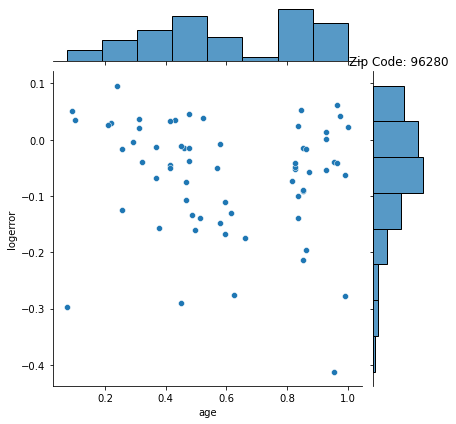

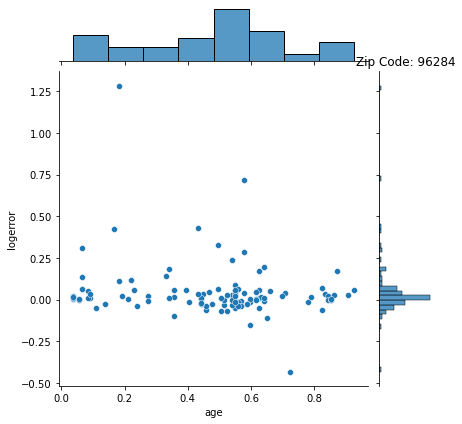

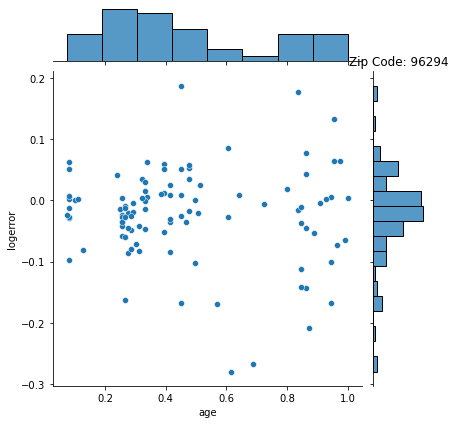

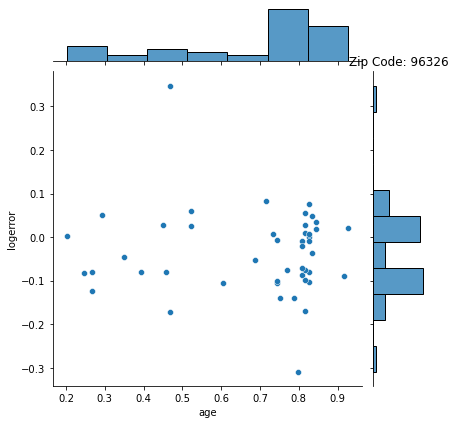

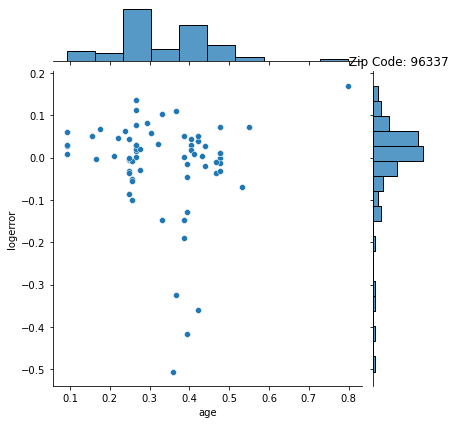

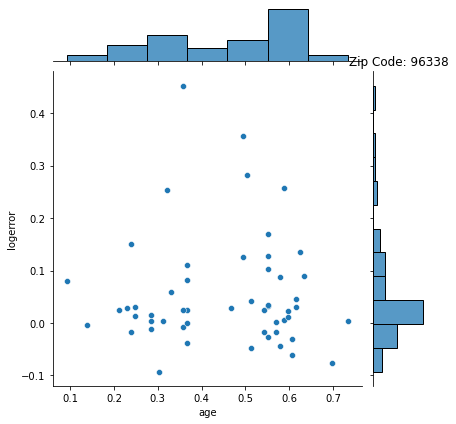

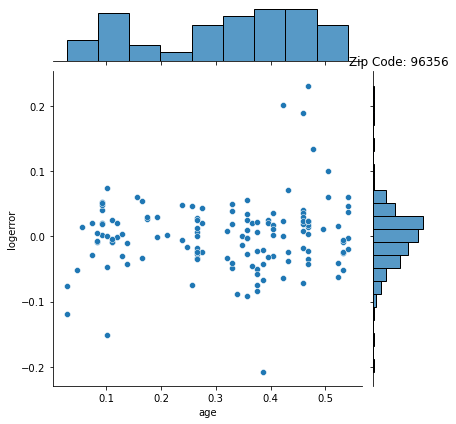

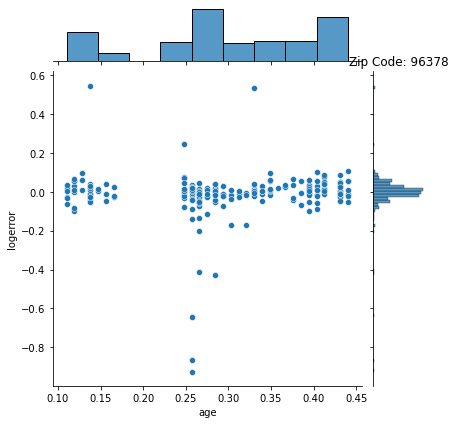

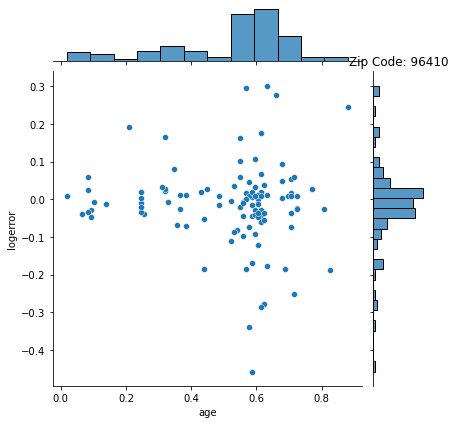

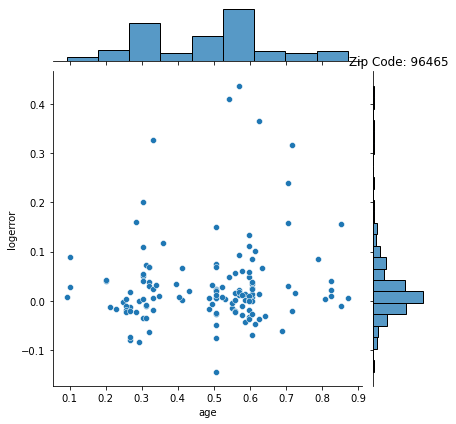

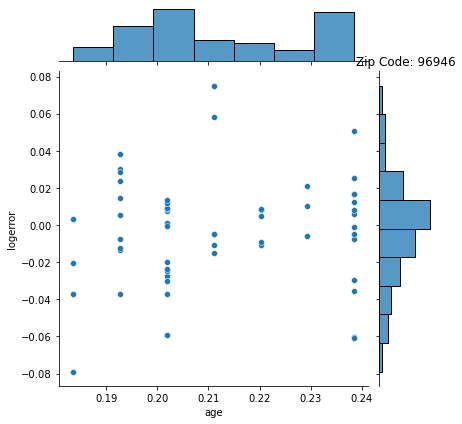

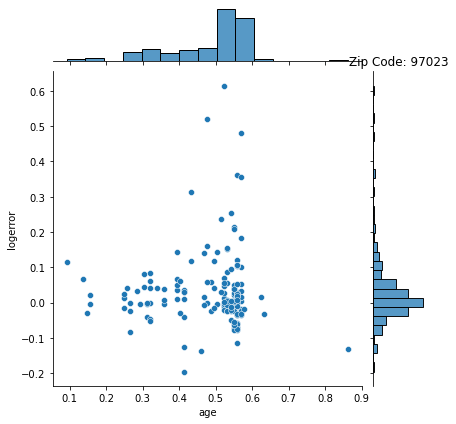

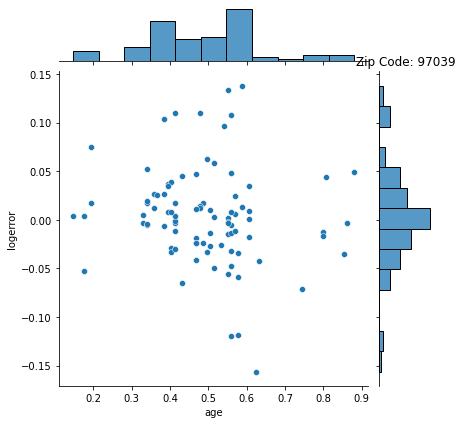

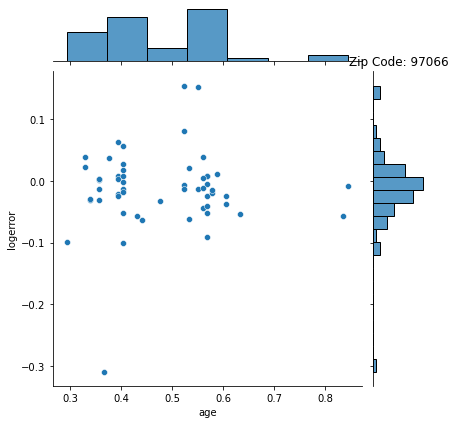

In [50]:
for i, subset in train.groupby('regionidzip'):
    if i in zip_list:
        sns.jointplot(x='age', y='logerror', data=subset)
        plt.xlabel('Age')
        plt.ylabel('Logerror')
        plt.title(f'Zip Code: {i}')
        plt.show()

## Takeaways:
Zip code does matter, age as well if in the right context. 

In [51]:
train.head()

,bathrooms,bedrooms,squarefeet,num_fireplace,latitude,longitude,regionidzip,threequarter_baths,logerror,age,fips_06037,fips_06059,fips_06111,hottub_or_spa,has_pool,tax_delinquency,lat_long_cluster,conts_cluster,age_sqft_cluster
44785,0.333333,0.6,0.359182,0.0,0.214570,0.792189,96964,0.0,0.262900,0.440367,0,1,0,0,0,0,1,3,2
16267,0.666667,0.8,0.780402,0.0,0.651305,0.498547,96370,0.0,-0.045759,0.467890,1,0,0,0,1,0,0,2,3
24208,0.500000,0.4,0.246035,0.0,0.213590,0.933771,96962,0.5,-0.011548,0.247706,0,1,0,0,0,0,1,0,2
40323,0.666667,0.4,0.465633,0.0,0.831267,0.732007,97328,0.0,-0.041808,0.293578,1,0,0,0,0,0,4,0,2
71569,0.000000,0.2,0.139937,0.0,0.376459,0.632366,96090,0.0,-0.090481,0.596330,1,0,0,0,0,0,3,4,1


In [52]:
train.head()

,bathrooms,bedrooms,squarefeet,num_fireplace,latitude,longitude,regionidzip,threequarter_baths,logerror,age,fips_06037,fips_06059,fips_06111,hottub_or_spa,has_pool,tax_delinquency,lat_long_cluster,conts_cluster,age_sqft_cluster
44785,0.333333,0.6,0.359182,0.0,0.214570,0.792189,96964,0.0,0.262900,0.440367,0,1,0,0,0,0,1,3,2
16267,0.666667,0.8,0.780402,0.0,0.651305,0.498547,96370,0.0,-0.045759,0.467890,1,0,0,0,1,0,0,2,3
24208,0.500000,0.4,0.246035,0.0,0.213590,0.933771,96962,0.5,-0.011548,0.247706,0,1,0,0,0,0,1,0,2
40323,0.666667,0.4,0.465633,0.0,0.831267,0.732007,97328,0.0,-0.041808,0.293578,1,0,0,0,0,0,4,0,2
71569,0.000000,0.2,0.139937,0.0,0.376459,0.632366,96090,0.0,-0.090481,0.596330,1,0,0,0,0,0,3,4,1


In [53]:
age_sqft

[0, 2, 3]

In [54]:
train = pd.get_dummies(train, columns=['age_sqft_cluster'])
validate = pd.get_dummies(validate, columns=['age_sqft_cluster'])
test = pd.get_dummies(test, columns=['age_sqft_cluster'])

In [55]:
columns = train.columns

In [56]:
columns

Index(['bathrooms', 'bedrooms', 'squarefeet', 'num_fireplace', 'latitude',
       'longitude', 'regionidzip', 'threequarter_baths', 'logerror', 'age',
       'fips_06037', 'fips_06059', 'fips_06111', 'hottub_or_spa', 'has_pool',
       'tax_delinquency', 'lat_long_cluster', 'conts_cluster',
       'age_sqft_cluster_0', 'age_sqft_cluster_1', 'age_sqft_cluster_2',
       'age_sqft_cluster_3'],
      dtype='object')

In [57]:
age_sqft = [str(x) for x in age_sqft]

for col in columns:
    if col.startswith('age_sqft'):
        split = col.split('_')
        print(split)
        print(age_sqft)
        if set(split).isdisjoint(set(age_sqft)):
            print('--')
            train = train.drop(columns=col)
            validate = validate.drop(columns=col)
            test = test.drop(columns=col)

['age', 'sqft', 'cluster', '0']
['0', '2', '3']
['age', 'sqft', 'cluster', '1']
['0', '2', '3']
--
['age', 'sqft', 'cluster', '2']
['0', '2', '3']
['age', 'sqft', 'cluster', '3']
['0', '2', '3']


In [58]:
train.head()

,bathrooms,bedrooms,squarefeet,num_fireplace,latitude,longitude,regionidzip,threequarter_baths,logerror,age,...,fips_06059,fips_06111,hottub_or_spa,has_pool,tax_delinquency,lat_long_cluster,conts_cluster,age_sqft_cluster_0,age_sqft_cluster_2,age_sqft_cluster_3
44785,0.333333,0.6,0.359182,0.0,0.214570,0.792189,96964,0.0,0.262900,0.440367,...,1,0,0,0,0,1,3,0,1,0
16267,0.666667,0.8,0.780402,0.0,0.651305,0.498547,96370,0.0,-0.045759,0.467890,...,0,0,0,1,0,0,2,0,0,1
24208,0.500000,0.4,0.246035,0.0,0.213590,0.933771,96962,0.5,-0.011548,0.247706,...,1,0,0,0,0,1,0,0,1,0
40323,0.666667,0.4,0.465633,0.0,0.831267,0.732007,97328,0.0,-0.041808,0.293578,...,0,0,0,0,0,4,0,0,1,0
71569,0.000000,0.2,0.139937,0.0,0.376459,0.632366,96090,0.0,-0.090481,0.596330,...,0,0,0,0,0,3,4,0,0,0


In [59]:
to_encode = ['conts_cluster', 'regionidzip', 'lat_long_cluster']
for col in to_encode:
    train = pd.get_dummies(train, columns=[col])
    validate = pd.get_dummies(validate, columns=[col])
    test = pd.get_dummies(test, columns=[col])

In [60]:
train.head()

,bathrooms,bedrooms,squarefeet,num_fireplace,latitude,longitude,threequarter_baths,logerror,age,fips_06037,...,regionidzip_97330,regionidzip_97331,regionidzip_97344,regionidzip_399675,lat_long_cluster_0,lat_long_cluster_1,lat_long_cluster_2,lat_long_cluster_3,lat_long_cluster_4,lat_long_cluster_5
44785,0.333333,0.6,0.359182,0.0,0.214570,0.792189,0.0,0.262900,0.440367,0,...,0,0,0,0,0,1,0,0,0,0
16267,0.666667,0.8,0.780402,0.0,0.651305,0.498547,0.0,-0.045759,0.467890,1,...,0,0,0,0,1,0,0,0,0,0
24208,0.500000,0.4,0.246035,0.0,0.213590,0.933771,0.5,-0.011548,0.247706,0,...,0,0,0,0,0,1,0,0,0,0
40323,0.666667,0.4,0.465633,0.0,0.831267,0.732007,0.0,-0.041808,0.293578,1,...,0,0,0,0,0,0,0,0,1,0
71569,0.000000,0.2,0.139937,0.0,0.376459,0.632366,0.0,-0.090481,0.596330,1,...,0,0,0,0,0,0,0,1,0,0


In [61]:
columns = train.columns

In [62]:
columns

Index(['bathrooms', 'bedrooms', 'squarefeet', 'num_fireplace', 'latitude',
       'longitude', 'threequarter_baths', 'logerror', 'age', 'fips_06037',
       ...
       'regionidzip_97330', 'regionidzip_97331', 'regionidzip_97344',
       'regionidzip_399675', 'lat_long_cluster_0', 'lat_long_cluster_1',
       'lat_long_cluster_2', 'lat_long_cluster_3', 'lat_long_cluster_4',
       'lat_long_cluster_5'],
      dtype='object', length=415)

In [63]:
lat_long_list = [str(x) for x in lat_long_list]

for col in columns:
    if col.startswith('lat_long'):
        split = col.split('_')
        print(split)
        print(age_sqft)
        if set(split).isdisjoint(set(lat_long_list)):
            print('--')
            train = train.drop(columns=col)
            validate = validate.drop(columns=col)
            test = test.drop(columns=col)

['lat', 'long', 'cluster', '0']
['0', '2', '3']
['lat', 'long', 'cluster', '1']
['0', '2', '3']
--
['lat', 'long', 'cluster', '2']
['0', '2', '3']
--
['lat', 'long', 'cluster', '3']
['0', '2', '3']
--
['lat', 'long', 'cluster', '4']
['0', '2', '3']
--
['lat', 'long', 'cluster', '5']
['0', '2', '3']
--


In [64]:
train.shape

(38192, 410)

In [65]:
zip_list = [str(x) for x in zip_list]

for col in columns:
    if col.startswith('regionidzip'):
        split = col.split('_')
        print(split)
        if set(split).isdisjoint(set(zip_list)):
            print('--')
            if col in train.columns:
                train = train.drop(columns=col)
            if col in validate.columns:
                validate = validate.drop(columns=col)
            if col in test.columns:
                test = test.drop(columns=col)

['regionidzip', '95982']
--
['regionidzip', '95983']
--
['regionidzip', '95984']
['regionidzip', '95985']
--
['regionidzip', '95986']
--
['regionidzip', '95987']
--
['regionidzip', '95988']
--
['regionidzip', '95989']
--
['regionidzip', '95991']
--
['regionidzip', '95992']
--
['regionidzip', '95993']
--
['regionidzip', '95994']
['regionidzip', '95995']
--
['regionidzip', '95996']
--
['regionidzip', '95997']
['regionidzip', '95998']
--
['regionidzip', '95999']
--
['regionidzip', '96000']
--
['regionidzip', '96001']
--
['regionidzip', '96002']
--
['regionidzip', '96003']
--
['regionidzip', '96004']
--
['regionidzip', '96005']
--
['regionidzip', '96006']
['regionidzip', '96007']
['regionidzip', '96008']
--
['regionidzip', '96009']
--
['regionidzip', '96010']
--
['regionidzip', '96012']
--
['regionidzip', '96013']
--
['regionidzip', '96014']
--
['regionidzip', '96015']
--
['regionidzip', '96016']
--
['regionidzip', '96017']
--
['regionidzip', '96018']
--
['regionidzip', '96019']
--
['regio

['regionidzip', '96981']
--
['regionidzip', '96982']
--
['regionidzip', '96983']
--
['regionidzip', '96985']
--
['regionidzip', '96986']
--
['regionidzip', '96987']
--
['regionidzip', '96989']
--
['regionidzip', '96990']
--
['regionidzip', '96993']
--
['regionidzip', '96995']
--
['regionidzip', '96996']
--
['regionidzip', '96998']
--
['regionidzip', '97001']
--
['regionidzip', '97003']
--
['regionidzip', '97004']
--
['regionidzip', '97005']
--
['regionidzip', '97006']
--
['regionidzip', '97007']
--
['regionidzip', '97008']
--
['regionidzip', '97016']
--
['regionidzip', '97018']
--
['regionidzip', '97020']
--
['regionidzip', '97021']
--
['regionidzip', '97023']
['regionidzip', '97024']
--
['regionidzip', '97025']
--
['regionidzip', '97026']
--
['regionidzip', '97027']
--
['regionidzip', '97035']
--
['regionidzip', '97037']
--
['regionidzip', '97039']
['regionidzip', '97040']
--
['regionidzip', '97041']
--
['regionidzip', '97043']
--
['regionidzip', '97047']
--
['regionidzip', '97048']
-

In [66]:
train.shape

(38192, 66)

In [67]:
conts_cluster = [str(x) for x in conts_cluster]

for col in columns:
    if col.startswith('conts_cluster'):
        split = col.split('_')
        print(split)
        if set(split).isdisjoint(set(conts_cluster)):
            print('--')
            train = train.drop(columns=col)
            validate = validate.drop(columns=col)
            test = test.drop(columns=col)

['conts', 'cluster', '0']
--
['conts', 'cluster', '1']
--
['conts', 'cluster', '2']
['conts', 'cluster', '3']
--
['conts', 'cluster', '4']
--
['conts', 'cluster', '5']
['conts', 'cluster', '6']
--
['conts', 'cluster', '7']


In [68]:
train.shape, validate.shape, test.shape

((38192, 61), (16368, 63), (13640, 63))

In [69]:
t_col = train.columns
v_col = validate.columns
test_col = test.columns
new_col = []
for col in t_col:
    if col.startswith('regionidzip'):
        new_col.append(col)
new_col2 = []
for col in v_col:
    if col.startswith('regionidzip'):
        new_col2.append(col)
new_col3 = []
for col in test_col:
    if col.startswith('regionidzip'):
        new_col3.append(col)

In [70]:
for col in new_col:
    if col not in new_col2:
        train = train.drop(columns=[col])
        print('--')
    elif col not in new_col3:
        train = train.drop(columns=[col])

In [71]:
validate.shape

(16368, 63)

In [72]:
for col in new_col2:
    if col not in new_col:
        validate = validate.drop(columns=[col])
    elif col not in new_col3: 
        validate = validate.drop(columns=[col])

In [73]:
for col in new_col3:
    if col not in new_col:
        test = test.drop(columns=[col])
    elif col not in new_col2: 
        test = test.drop(columns=[col])

In [74]:
validate.shape

(16368, 61)

In [75]:
train.shape

(38192, 61)

In [76]:
test.shape

(13640, 61)

In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38192 entries, 44785 to 14645
Data columns (total 61 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bathrooms           38192 non-null  float64
 1   bedrooms            38192 non-null  float64
 2   squarefeet          38192 non-null  float64
 3   num_fireplace       38192 non-null  float64
 4   latitude            38192 non-null  float64
 5   longitude           38192 non-null  float64
 6   threequarter_baths  38192 non-null  float64
 7   logerror            38192 non-null  float64
 8   age                 38192 non-null  float64
 9   fips_06037          38192 non-null  uint8  
 10  fips_06059          38192 non-null  uint8  
 11  fips_06111          38192 non-null  uint8  
 12  hottub_or_spa       38192 non-null  uint8  
 13  has_pool            38192 non-null  uint8  
 14  tax_delinquency     38192 non-null  uint8  
 15  age_sqft_cluster_0  38192 non-null  uint8  
 16  